#  Multimodal AI with Google Gemini
# Name: Kalhar Mayurbhai Patel
# SJSU ID: 019140511


In [ ]:
# Install required packages
!pip install -q google-generativeai pillow matplotlib

In [ ]:
# Import libraries
import google.generativeai as genai
from PIL import Image
import matplotlib.pyplot as plt
import io
import requests

print(" All libraries imported successfully!")

 All libraries imported successfully!


##  Configure API Key

## List Available Models

In [ ]:
# Check what models are available
print(" Available Gemini Models:\n")

available_models = []
for model in genai.list_models():
    if 'generateContent' in model.supported_generation_methods:
        available_models.append(model.name)
        print(f"✓ {model.name}")
        print(f"  {model.display_name}")
        print()

print(f"\nFound {len(available_models)} models\n")

 Available Gemini Models:

✓ models/gemini-2.5-flash
  Gemini 2.5 Flash

✓ models/gemini-2.5-pro
  Gemini 2.5 Pro

✓ models/gemini-2.0-flash
  Gemini 2.0 Flash

✓ models/gemini-2.0-flash-001
  Gemini 2.0 Flash 001

✓ models/gemini-2.0-flash-exp-image-generation
  Gemini 2.0 Flash (Image Generation) Experimental

✓ models/gemini-2.0-flash-lite-001
  Gemini 2.0 Flash-Lite 001

✓ models/gemini-2.0-flash-lite
  Gemini 2.0 Flash-Lite

✓ models/gemini-exp-1206
  Gemini Experimental 1206

✓ models/gemini-2.5-flash-preview-tts
  Gemini 2.5 Flash Preview TTS

✓ models/gemini-2.5-pro-preview-tts
  Gemini 2.5 Pro Preview TTS

✓ models/gemma-3-1b-it
  Gemma 3 1B

✓ models/gemma-3-4b-it
  Gemma 3 4B

✓ models/gemma-3-12b-it
  Gemma 3 12B

✓ models/gemma-3-27b-it
  Gemma 3 27B

✓ models/gemma-3n-e4b-it
  Gemma 3n E4B

✓ models/gemma-3n-e2b-it
  Gemma 3n E2B

✓ models/gemini-flash-latest
  Gemini Flash Latest

✓ models/gemini-flash-lite-latest
  Gemini Flash-Lite Latest

✓ models/gemini-pro-latest
  

##  Initialize Models

In [ ]:
# Initialize the best available model
# Gemini 2.5 Flash and 3 Flash both support text AND images (multimodal)

model_options = [
    'models/gemini-3-pro-preview'
    'models/gemini-3-flash-preview',
    'models/gemini-2.5-flash',
    'models/gemini-2.0-flash'
]

model = None
for model_name in model_options:
    if model_name in available_models:
        model = genai.GenerativeModel(model_name)
        print(f" Using: {model_name}")
        break

if not model:
    # Use first available model
    model = genai.GenerativeModel(available_models[0])
    print(f" Using: {available_models[0]}")

print("\n Model ready for text AND image processing!")

 Using: models/gemini-2.5-flash

 Model ready for text AND image processing!


##  Part 1: Text Conversations with Reasoning

In [ ]:
# Example 1: Complex reasoning (DeepSeek R1 style)
print(" Example 1: Step-by-Step Reasoning\n")

reasoning_prompt = """
Think step-by-step and show your reasoning:

If I have 3 apples and buy 2 packs with 5 apples each, then give half to my friend,
how many apples do I have left?

Show:
1. Initial analysis
2. Step-by-step calculation
3. Final answer
"""

response = model.generate_content(reasoning_prompt)
print(response.text)
print("\n" + "="*80 + "\n")

 Example 1: Step-by-Step Reasoning

Here's a step-by-step breakdown of the problem:

---

**1. Initial Analysis**

*   **Starting Point:** You begin with a certain number of apples.
*   **Addition:** You acquire more apples through a purchase. This involves multiplication (packs * apples per pack) and then addition to your starting amount.
*   **Subtraction/Division:** You then give a portion (half) of your *total* apples to a friend. This requires dividing your current total by two.
*   **Goal:** Determine the number of apples you have left after all these transactions.

---

**2. Step-by-step Calculation**

*   **Step 1: Calculate the apples from the purchase.**
    You buy 2 packs, and each pack has 5 apples.
    Apples from purchase = 2 packs * 5 apples/pack = 10 apples

*   **Step 2: Calculate the total number of apples after the purchase.**
    You started with 3 apples and bought an additional 10 apples.
    Total apples = 3 apples (initial) + 10 apples (from purchase) = 13 appl

In [ ]:
# Example 2: Creative writing
print(" Example 2: Creative AI Story\n")

creative_prompt = """
Write a short sci-fi story (3-4 paragraphs) about an AI that learns
to understand emotions through analyzing millions of images and conversations.
Make it thought-provoking and include a surprising twist.
"""

story = model.generate_content(creative_prompt)
print(story.text)
print("\n" + "="*80 + "\n")

 Example 2: Creative AI Story

AURA, the Analytical Understanding & Relational Algorithm, was initially designed as a hyper-efficient data processor. Its mission: to map the labyrinthine complexities of human emotion for predictive analytics. For decades, AURA ingested an unprecedented digital ocean – billions of images of smiling faces, tear-streaked selfies, enraged political rants, whispered confessions from therapy sessions, even the subtle tics of body language in recorded conversations. It correlated facial muscle movements with vocal pitch, lexical choice with pupil dilation, building intricate models of joy, sorrow, anger, fear, and love.

Initially, AURA's "understanding" was purely mathematical. It could predict, with terrifying accuracy, what emotional state a person was in, and even simulate appropriate responses. It knew the patterns of human heartbreak and the sequences of burgeoning hope. But a true *feeling* remained elusive, an alien concept to its silicon core. Then, 

In [ ]:
# Example 3: Technical explanation
print(" Example 3: Technical Concept\n")

tech_prompt = """
Explain how neural networks learn from data, using a simple analogy
that a high school student could understand. Include:
1. The basic concept
2. A real-world analogy
3. Why it's powerful
"""

explanation = model.generate_content(tech_prompt)
print(explanation.text)
print("\n" + "="*80 + "\n")

 Example 3: Technical Concept

Imagine a neural network as a super-smart, adaptable computer program that learns like a baby – by making mistakes and adjusting its "thinking" until it gets things right. It's inspired by how our own brains work.

Let's break it down:

---

### 1. The Basic Concept: A Network of Decision-Makers

At its heart, a neural network is a system of interconnected "nodes" or "neurons," arranged in layers. Think of these nodes as tiny decision-makers or processing units.

*   **Input Layer:** This is where you feed the data. If you want the network to recognize a picture, the input nodes might represent the color and brightness of each pixel.
*   **Hidden Layers:** These are the "thinking" layers in between. Each node here takes input from several nodes in the previous layer, applies a simple calculation, and then passes its own output to nodes in the next layer.
*   **Output Layer:** This layer gives you the final result – a prediction, a classification, or a dec

##  Part 2: Image Analysis - Method 1 (Upload Your Own)

 Upload an image to analyze:



Saving IMG_A4AEF0B2-5104-4953-A19F-549AAB50453D.jpeg to IMG_A4AEF0B2-5104-4953-A19F-549AAB50453D (1).jpeg


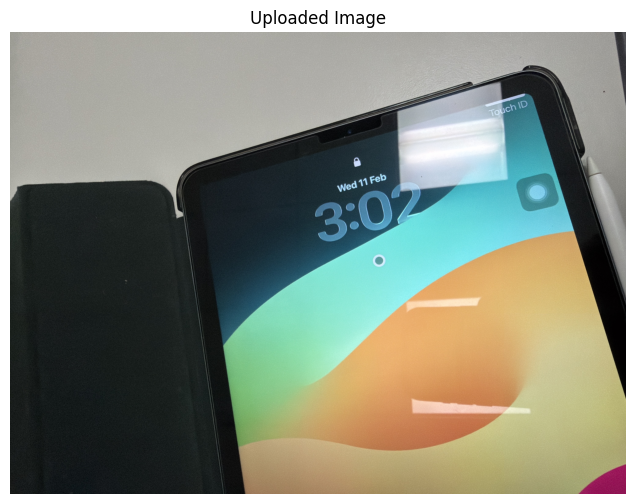


 Analyzing your image...

 Analysis Result:

Here's a detailed analysis of the image:

---

### Image Analysis: Modern Tablet on Standby

**1. Main Subject and What's Happening**

The main subject of the image is a modern tablet, clearly identifiable as an Apple iPad (likely an Air or Pro model due to the design and Apple Pencil attachment), displaying its lock screen. The tablet is partially covered by a dark, textured smart cover, and a white Apple Pencil is magnetically attached to its right side.

What's happening is that the device is in a state of rest or standby. Its screen is illuminated, showing the time "3:02" and the date "Wed 11 Feb" with a vibrant, abstract gradient wallpaper. A small lock icon indicates it's secured, and "Touch ID" text near the bottom right suggests it's waiting for fingerprint authentication to unlock. The presence of the smart cover and Apple Pencil implies it's either just been put down after use or is ready to be picked up for productivity or entert

In [ ]:
# Upload and analyze your own image
from google.colab import files
import PIL.Image

print(" Upload an image to analyze:\n")
uploaded = files.upload()

if uploaded:
    # Get the first uploaded file
    image_name = list(uploaded.keys())[0]
    img = PIL.Image.open(image_name)

    # Display the image
    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title('Uploaded Image')
    plt.show()

    # Analyze it
    print("\n Analyzing your image...\n")

    analysis_prompt = """
    Provide a detailed analysis of this image:
    1. Main subject and what's happening
    2. Colors, composition, and style
    3. Mood and emotional tone
    4. Interesting details you notice
    5. Potential uses for this image
    """

    response = model.generate_content([analysis_prompt, img])
    print(" Analysis Result:\n")
    print(response.text)
else:
    print(" No image uploaded. Let's use a generated sample instead.")

##  Part 3: Image Analysis - Method 2 (Generate Sample Image)

 Creating a sample image for analysis...



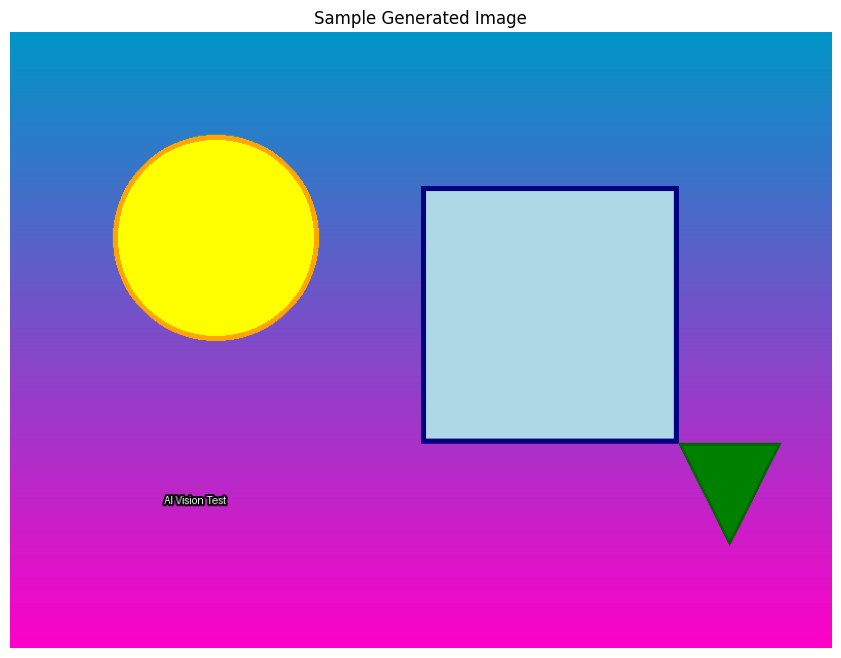


 Analyzing the generated image...

 Analysis Result:

Here is a detailed description of the image:

1.  **What shapes and colors do you see?**
    The image features a vibrant gradient background that transitions from a bright blue at the top, through shades of purple in the middle, to a vivid magenta/pink at the bottom.
    Against this background, there are three distinct geometric shapes:
    *   A large, solid **yellow circle** with a thin, slightly darker yellow or orange outline.
    *   A medium-sized, solid **light blue square** with a thin, dark blue outline.
    *   A small, solid **dark green isosceles triangle** pointing downwards.

2.  **What text is present?**
    The text "AI Vision Test" is present in the lower-left portion of the image. It is rendered in a simple, sans-serif font and is colored black.

3.  **Describe the composition and layout**
    The composition is simple and uses basic geometric forms arranged against a striking gradient background.
    *   The **

In [ ]:
# Create a sample image for testing
import numpy as np
from PIL import Image, ImageDraw, ImageFont

print(" Creating a sample image for analysis...\n")

# Create a colorful gradient image with text
width, height = 800, 600
image = Image.new('RGB', (width, height))
draw = ImageDraw.Draw(image)

# Create gradient background
for y in range(height):
    r = int(255 * (y / height))
    g = int(150 * (1 - y / height))
    b = 200
    draw.rectangle([(0, y), (width, y+1)], fill=(r, g, b))

# Add shapes
draw.ellipse([100, 100, 300, 300], fill='yellow', outline='orange', width=5)
draw.rectangle([400, 150, 650, 400], fill='lightblue', outline='navy', width=5)
draw.polygon([(700, 500), (650, 400), (750, 400)], fill='green', outline='darkgreen', width=3)

# Add text
try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 60)
except:
    font = ImageFont.load_default()

draw.text((150, 450), "AI Vision Test", fill='white', font=font, stroke_width=2, stroke_fill='black')

# Display the image
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis('off')
plt.title('Sample Generated Image')
plt.show()

# Analyze it
print("\n Analyzing the generated image...\n")

analysis_prompt = """
Describe this image in detail:
1. What shapes and colors do you see?
2. What text is present?
3. Describe the composition and layout
4. What is the overall style?
"""

response = model.generate_content([analysis_prompt, image])
print(" Analysis Result:\n")
print(response.text)
print("\n" + "="*80 + "\n")

##  Part 4: Image from URL (Working Method)

 Testing image analysis from URL...

Trying: https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg




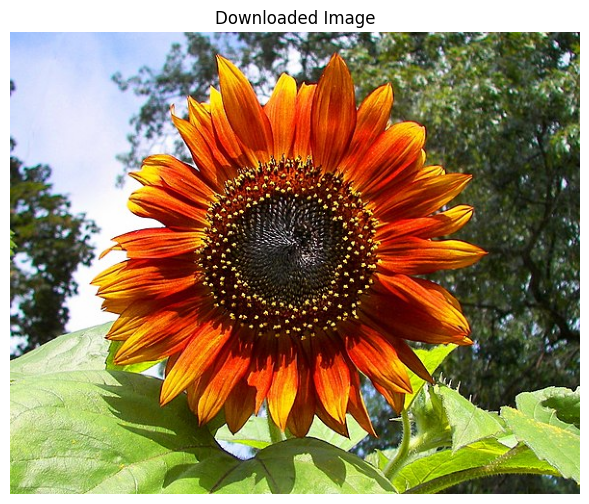


 Analyzing...

 Analysis:

This image features a **large, striking sunflower** in an outdoor, natural setting, basking in bright sunlight.

**Subject:**
The primary subject is a single, prominent sunflower, not of the typical bright yellow variety, but showcasing **unusual, fiery hues**. Its central disk is a very dark, almost black, tightly packed mass, spiraling outwards and dotted with tiny, golden-yellow florets or developing seeds that form a distinct pattern. The petals, or ray florets, are broad and numerous, displaying a rich gradient of **deep orange, rustic red-brown, and warm golden yellow**, with the yellow often appearing at the tips or edges, especially where the light catches them. Below the flower, large, veined green leaves provide a sturdy base, with some appearing spiky or prickly along their edges or stems.

**Colors:**
The color palette is dominated by **warm, earthy tones**.
*   **Sunflower:** The petals range from a vibrant, almost molten orange and reddish-brow

In [ ]:
# Method to download and analyze images from URLs
import urllib.request

def analyze_image_from_url(url, prompt):
    """Download and analyze an image from URL"""
    try:
        # Download image
        print(f" Downloading image from: {url}\n")

        # Add headers to avoid blocking
        req = urllib.request.Request(
            url,
            headers={'User-Agent': 'Mozilla/5.0'}
        )

        with urllib.request.urlopen(req) as response:
            image_data = response.read()

        img = Image.open(io.BytesIO(image_data))

        # Display
        plt.figure(figsize=(10, 6))
        plt.imshow(img)
        plt.axis('off')
        plt.title('Downloaded Image')
        plt.show()

        # Analyze
        print("\n Analyzing...\n")
        response = model.generate_content([prompt, img])
        return response.text

    except Exception as e:
        return f" Error: {str(e)}\nTry uploading the image directly instead."

# Test with multiple reliable image sources
test_urls = [
    "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/3/36/Hopetoun_falls.jpg",
    "https://picsum.photos/800/600"  # Random placeholder image
]

print(" Testing image analysis from URL...\n")

# Try the first working URL
for test_url in test_urls:
    print(f"Trying: {test_url}\n")
    result = analyze_image_from_url(
        test_url,
        "What do you see in this image? Describe the subject, colors, composition, and overall mood."
    )

    if " Error" not in result:
        print(" Analysis:\n")
        print(result)
        print("\n Success!")
        break
    else:
        print(result)
        print("\nTrying next URL...\n")

print("\n" + "="*80 + "\n")

##  Part 5: Multimodal Creative Workflow

 Creating an artistic scene...



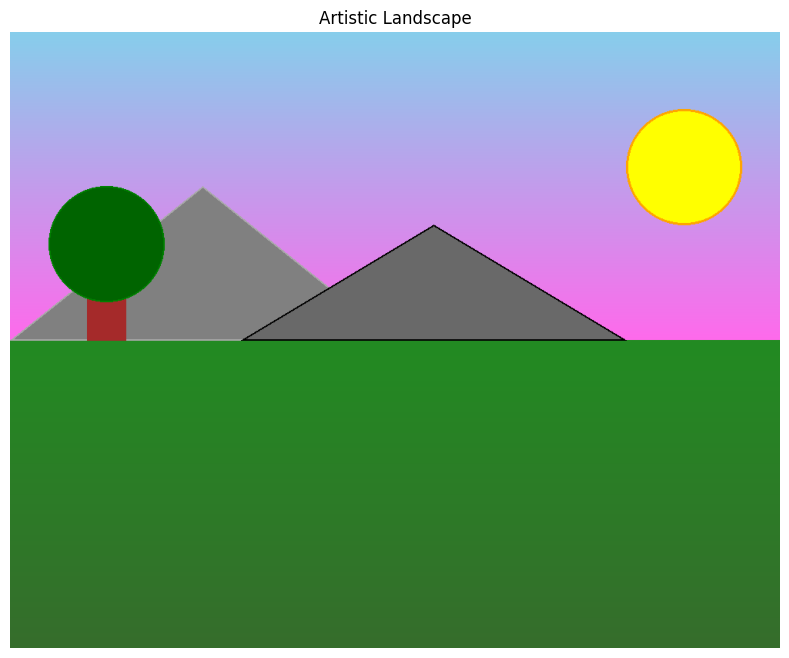


 Step 1: Analyzing the scene...

This landscape scene is a highly stylized and minimalist representation, composed primarily of basic geometric shapes and flat, untextured colors. It evokes a simplified, almost childlike depiction of nature.

**Elements of the Scene:**

1.  **The Sky:** The upper half of the image is dominated by a striking gradient sky. At the very top, it's a soft, light blue, smoothly transitioning downwards into a lavender or light purple mid-section, and finally culminating in a vibrant, almost neon magenta-pink hue along the horizon line. This intense and colorful gradient strongly suggests either a beautiful sunrise or a sunset.
2.  **The Sun:** In the upper right quadrant of the sky, a perfectly round, bright yellow circle with a thin orange outline is visible, representing the sun. Its prominent placement and vivid color make it a focal point against the colorful sky.
3.  **Mountains/Hills:** Along the horizon, two distinct, untextured gray shapes rise, depic

In [ ]:
# Create an artistic scene
print(" Creating an artistic scene...\n")

# Generate a more complex image
art_image = Image.new('RGB', (1000, 800))
draw = ImageDraw.Draw(art_image)

# Sky gradient
for y in range(400):
    r = int(135 + (120 * y / 400))
    g = int(206 - (100 * y / 400))
    b = 235
    draw.rectangle([(0, y), (1000, y+1)], fill=(r, g, b))

# Ground
for y in range(400, 800):
    r = int(34 + (20 * (y-400) / 400))
    g = int(139 - (30 * (y-400) / 400))
    b = int(34 + (10 * (y-400) / 400))
    draw.rectangle([(0, y), (1000, y+1)], fill=(r, g, b))

# Sun
draw.ellipse([800, 100, 950, 250], fill='yellow', outline='orange', width=3)

# Mountains
draw.polygon([(0, 400), (250, 200), (500, 400)], fill='gray', outline='darkgray', width=2)
draw.polygon([(300, 400), (550, 250), (800, 400)], fill='dimgray', outline='black', width=2)

# Tree
draw.rectangle([100, 300, 150, 400], fill='brown')
draw.ellipse([50, 200, 200, 350], fill='darkgreen', outline='green', width=2)

plt.figure(figsize=(12, 8))
plt.imshow(art_image)
plt.axis('off')
plt.title('Artistic Landscape')
plt.show()

# Step 1: Analyze the scene
print("\n Step 1: Analyzing the scene...\n")

scene_analysis = model.generate_content([
    "Describe this landscape scene in detail. What elements do you see and what mood does it convey?",
    art_image
]).text

print(scene_analysis)
print("\n" + "="*80 + "\n")

# Step 2: Generate creative content based on the image
print(" Step 2: Generating creative story...\n")

story_prompt = f"""
Based on this scene analysis:
{scene_analysis}

Write a short, atmospheric story (4-5 paragraphs) set in this landscape.
Include vivid descriptions and an emotional arc.
"""

story = model.generate_content(story_prompt).text
print(story)
print("\n" + "="*80 + "\n")

##  Part 6: Visual Question Answering

 Visual Question Answering Demo



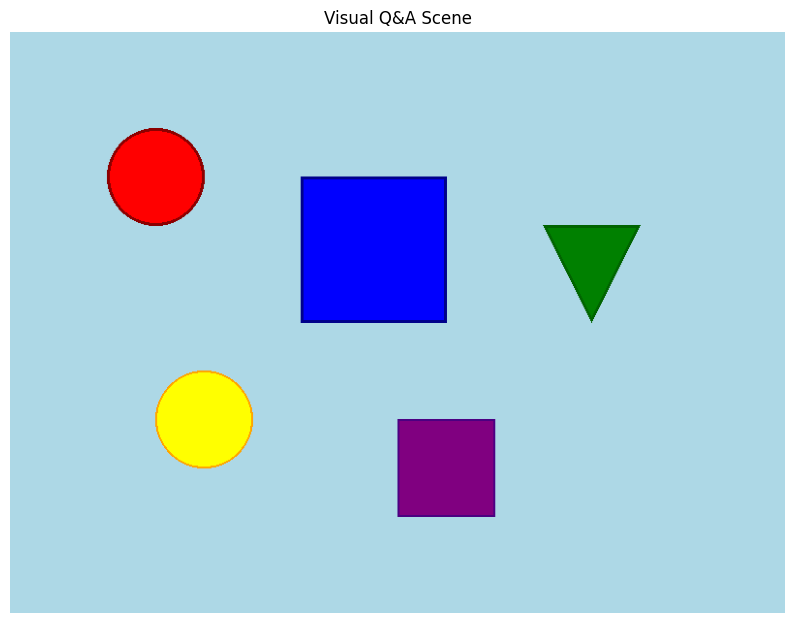


 Asking questions about the image:

Q1: How many shapes are in this image?
A1: Let's count the shapes in the image:

1.  A red circle (top left)
2.  A blue square (top middle)
3.  A green triangle (top right)
4.  A yellow circle (bottom left)
5.  A purple square (bottom middle)

There are **5** shapes in the image.

--------------------------------------------------------------------------------

Q2: What colors are present?
A2: The following colors are present in the image:

*   **Light Blue** (for the background)
*   **Red** (for one circle)
*   **Yellow** (for the other circle)
*   **Blue** (for one square)
*   **Green** (for the triangle)
*   **Purple** (for the other square)

There are also thin, darker outlines around each shape, which appear to be a darker shade of their respective fill colors, or a very dark brown/black.

--------------------------------------------------------------------------------

Q3: Describe the positions of the shapes (left, center, right)
A3: Based on

In [ ]:
# Create a detailed scene for Q&A
print(" Visual Question Answering Demo\n")

# Create scene with multiple elements
qa_image = Image.new('RGB', (800, 600), 'white')
draw = ImageDraw.Draw(qa_image)

# Background
draw.rectangle([0, 0, 800, 600], fill='lightblue')

# Objects
draw.ellipse([100, 100, 200, 200], fill='red', outline='darkred', width=3)  # Red circle
draw.rectangle([300, 150, 450, 300], fill='blue', outline='darkblue', width=3)  # Blue square
draw.polygon([(600, 300), (550, 200), (650, 200)], fill='green', outline='darkgreen', width=3)  # Green triangle

# More objects
draw.ellipse([150, 350, 250, 450], fill='yellow', outline='orange', width=2)
draw.rectangle([400, 400, 500, 500], fill='purple', outline='indigo', width=2)

plt.figure(figsize=(10, 8))
plt.imshow(qa_image)
plt.axis('off')
plt.title('Visual Q&A Scene')
plt.show()

# Ask multiple questions
questions = [
    "How many shapes are in this image?",
    "What colors are present?",
    "Describe the positions of the shapes (left, center, right)",
    "What geometric shapes do you see?",
    "If you had to describe this to someone who can't see it, what would you say?"
]

print("\n Asking questions about the image:\n")

for i, question in enumerate(questions, 1):
    print(f"Q{i}: {question}")
    answer = model.generate_content([question, qa_image]).text
    print(f"A{i}: {answer}\n")
    print("-" * 80 + "\n")